In [5]:
# !pip install PyWavelets

In [1]:
# import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
# from scipy.stats import skew
from tqdm import tqdm

In [2]:
# patients_numbers = ["01", "02", "03", "05", "07", "08", "10"]
# # "06" has 10 seizures 
# # "24" has 16 seizures

In [3]:
x = np.load('./chb-mit-kaggle/eeg-seizure_train.npz', mmap_mode='r')
for k in x.files:
    print(k)

train_signals
train_labels


In [4]:
npz_file = np.load("./chb-mit-kaggle/eeg-seizure_train.npz", allow_pickle=True)

In [5]:
train_signals = npz_file['train_signals']
train_labels = npz_file['train_labels']

seizure = train_signals[train_labels==1]
non_seizure = train_signals[train_labels==0]


In [6]:
train_signals.shape, train_labels.shape

((37666, 23, 256), (37666,))

In [7]:
seizure.shape, non_seizure.shape

((8074, 23, 256), (29592, 23, 256))

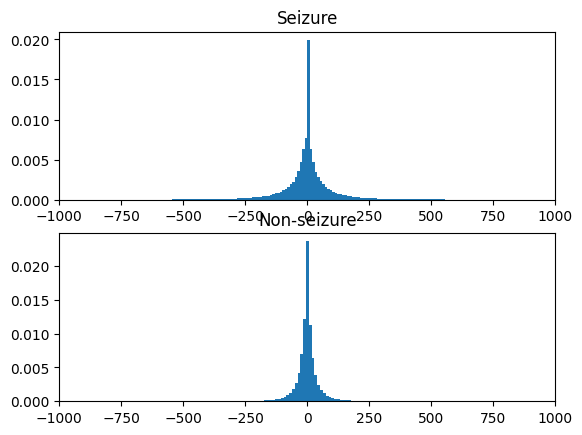

In [8]:
plt.subplot(2,1,1)
plt.hist(seizure.reshape(-1), bins=500, density=True)
plt.title("Seizure")
plt.xlim([-1000, 1000])

plt.subplot(2,1,2)
plt.hist(non_seizure.reshape(-1), bins=500, density=True)
plt.title("Non-seizure")
plt.xlim([-1000, 1000])
plt.show()

In [14]:
# feature engineering
def feature_engineering(train_signals):
    train_feature = []
    for sample in tqdm(train_signals):
        # for i in range(int(sample.shape[1])+1):
            # Calculate DWT of 1 sec. epochs using "coif3" and 7 level.
                coeffs = pywt.wavedec(sample[0:23, 0:256], "coif3", level=7)
                cA7, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs
                band1_en = []
                band2_en = []
                band3_en = []
                band4_en = []
                band5_en = []
                band6_en = []

                band1_max = []
                band2_max = []
                band3_max = []
                band4_max = []
                band5_max = []
                band6_max = []

                band1_min = []
                band2_min = []
                band3_min = []
                band4_min = []
                band5_min = []
                band6_min = []

                band1_mean = []
                band2_mean = []
                band3_mean = []
                band4_mean = []
                band5_mean = []
                band6_mean = []

                band1_std = []
                band2_std = []
                band3_std = []
                band4_std = []
                band5_std = []
                band6_std = []

                band1_skew = []
                band2_skew = []
                band3_skew = []
                band4_skew = []
                band5_skew = []
                band6_skew = []
                # Calculate 5 features of DWT coefficients.
                for i in range(len(cD1)):
                    band1_en.append(np.sum(cD7[i, :] ** 2))
                    band2_en.append(np.sum(cD6[i, :] ** 2))
                    band3_en.append(np.sum(cD5[i, :] ** 2))
                    band4_en.append(np.sum(cD4[i, :] ** 2))
                    band5_en.append(np.sum(cD3[i, :] ** 2))
                    band6_en.append(np.sum(cD2[i, :] ** 2))

                    band1_max.append(np.max(cD7[i, :]))
                    band2_max.append(np.max(cD6[i, :]))
                    band3_max.append(np.max(cD5[i, :]))
                    band4_max.append(np.max(cD4[i, :]))
                    band5_max.append(np.max(cD3[i, :]))
                    band6_max.append(np.max(cD2[i, :]))

                    band1_min.append(np.min(cD7[i, :]))
                    band2_min.append(np.min(cD6[i, :]))
                    band3_min.append(np.min(cD5[i, :]))
                    band4_min.append(np.min(cD4[i, :]))
                    band5_min.append(np.min(cD3[i, :]))
                    band6_min.append(np.min(cD2[i, :]))

                    band1_mean.append(np.mean(cD7[i, :]))
                    band2_mean.append(np.mean(cD6[i, :]))
                    band3_mean.append(np.mean(cD5[i, :]))
                    band4_mean.append(np.mean(cD4[i, :]))
                    band5_mean.append(np.mean(cD3[i, :]))
                    band6_mean.append(np.mean(cD2[i, :]))

                    band1_std.append(np.std(cD7[i, :]))
                    band2_std.append(np.std(cD6[i, :]))
                    band3_std.append(np.std(cD5[i, :]))
                    band4_std.append(np.std(cD4[i, :]))
                    band5_std.append(np.std(cD3[i, :]))
                    band6_std.append(np.std(cD2[i, :]))


                band1_en = (np.array(band1_en).reshape(1, -1))
                band2_en = (np.array(band2_en).reshape(1, -1))
                band3_en = (np.array(band3_en).reshape(1, -1))
                band4_en = (np.array(band4_en).reshape(1, -1))
                band5_en = (np.array(band5_en).reshape(1, -1))
                band6_en = (np.array(band6_en).reshape(1, -1))

                band1_max = np.array(band1_max).reshape(1, -1)
                band2_max = np.array(band2_max).reshape(1, -1)
                band3_max = np.array(band3_max).reshape(1, -1)
                band4_max = np.array(band4_max).reshape(1, -1)
                band5_max = np.array(band5_max).reshape(1, -1)
                band6_max = np.array(band6_max).reshape(1, -1)

                band1_min = np.array(band1_min).reshape(1, -1)
                band2_min = np.array(band2_min).reshape(1, -1)
                band3_min = np.array(band3_min).reshape(1, -1)
                band4_min = np.array(band4_min).reshape(1, -1)
                band5_min = np.array(band5_min).reshape(1, -1)
                band6_min = np.array(band6_min).reshape(1, -1)

                band1_mean = np.array(band1_mean).reshape(1, -1)
                band2_mean = np.array(band2_mean).reshape(1, -1)
                band3_mean = np.array(band3_mean).reshape(1, -1)
                band4_mean = np.array(band4_mean).reshape(1, -1)
                band5_mean = np.array(band5_mean).reshape(1, -1)
                band6_mean = np.array(band6_mean).reshape(1, -1)

                band1_std = np.array(band1_std).reshape(1, -1)
                band2_std = np.array(band2_std).reshape(1, -1)
                band3_std = np.array(band3_std).reshape(1, -1)
                band4_std = np.array(band4_std).reshape(1, -1)
                band5_std = np.array(band5_std).reshape(1, -1)
                band6_std = np.array(band6_std).reshape(1, -1)

                # Create feature vector.
                feature_vector = np.concatenate((band1_en, band1_max, band1_min, band1_mean, band1_std,
                                                    band2_en, band2_max, band2_min, band2_mean, band2_std, 
                                                    band3_en, band3_max, band3_min, band3_mean, band3_std,
                                                    band4_en, band4_max, band4_min, band4_mean, band4_std,
                                                    band5_en, band5_max, band5_min, band5_mean, band5_std,
                                                    band6_en, band6_max, band6_min, band6_mean, band6_std,                                                ), axis=0)
                # print(np.transpose(feature_vector).shape)
                # Obtain training dataset as a list of array.
                train_feature.append(np.transpose(feature_vector))
    return train_feature
            


In [15]:
# train_feature = feature_engineering(train_signals)

In [16]:
import pickle 

# with open("dwt_features.pkl", mode="wb") as file:
#     pickle.dump(train_feature, file, pickle.HIGHEST_PROTOCOL)
with open("dwt_features.pkl", mode="rb") as file:
    train_feature = pickle.load(file)


In [17]:
train_feature = np.array(train_feature)
train_feature.shape

(37666, 23, 30)

In [18]:
train_feature_seizure = train_feature[train_labels==1]
train_feature_nonseizure = train_feature[train_labels==0]

# Visualize for channel 1

In [19]:
# for j in range(23):
#     print(f"Channel{1+j}")
#     for i in tqdm(range(30)):
#         # plt.subplot(2,1,1)
#         plt.hist(train_feature_seizure[:, 0, i], bins=500, density=True)
#         # plt.title("Seizure")
#         # plt.ylabel("PDF")

#         # plt.subplot(2,1,2)
#         plt.hist(train_feature_nonseizure[:, 0, i], bins=500, density=True)
#         # plt.title("Non-seizure")
#         plt.ylabel("PDF")
#         plt.legend(["Seizure", "Non-seizure"])

#         plt.suptitle(f"Channel{j}: Feature {i+1}")
#         # plt.show()
#         plt.savefig(f"./plots/Channel{j}: Feature {i+1}.png")
#         plt.close()



# Taking one feature from one class as our discriminative feature

In [20]:
x = np.load('./chb-mit-kaggle/eeg-seizure_val.npz', mmap_mode='r')
for k in x.files:
    print(k)

val_signals
val_labels


In [21]:
npz_file = np.load("./chb-mit-kaggle/eeg-seizure_val.npz", allow_pickle=True)
test_signals = npz_file['val_signals']
test_labels = npz_file['val_labels']


In [22]:
test_features = feature_engineering(test_signals)

  0%|          | 0/8071 [00:00<?, ?it/s]/Users/raunavghosh/miniconda3/envs/.env/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 7 is too high: all coefficients will experience boundary effects.
  warnings.warn(
100%|██████████| 8071/8071 [00:16<00:00, 486.68it/s]


In [23]:
def gaussian(x, mean, std_dev):
    den = np.sqrt(2*np.pi)*std_dev
    num = np.exp(0.5*(x-mean)**2 / (std_dev+1e-8), dtype='float')
    return num/den

In [24]:
f_idx = (6, 2)# feature index; channel 9, feature 15

s_prior = sum(train_labels)/len(train_labels)
ns_prior = 1 - s_prior
s_prior, ns_prior

(0.21435777624382732, 0.7856422237561727)

In [25]:
f_idx

(6, 2)

In [26]:
s_mean = np.mean(train_feature_seizure[:, f_idx[0], f_idx[1]])
ns_mean = np.mean(train_feature_nonseizure[:, f_idx[0], f_idx[1]])
s_mean, ns_mean

(-469.1233076011241, -197.65968719239333)

In [27]:
s_std_dev = np.std(train_feature_seizure[:, f_idx[0], f_idx[1]])
ns_std_dev = np.std(train_feature_nonseizure[:, f_idx[0], f_idx[1]])
s_std_dev, ns_std_dev

(586.453998709449, 250.37836509347096)

In [28]:
test_features = np.array(test_features)
test_features.shape

(8071, 23, 30)

In [29]:
def prediction(test_features, threshold, f_idx):
    # threshold = 0.5
    preds = []
    for x in test_features[:, f_idx[0], f_idx[1]]:
        s_lh = gaussian(x, s_mean, s_std_dev)
        ns_lh = gaussian(x, ns_mean, ns_std_dev)

        lrt = s_lh/ns_lh
        if lrt > threshold:
            preds.append(1)
        else:
            preds.append(0)
    return preds

In [30]:
def get_tpr_fpr(true, pred):
    tpr = 0
    fpr = 0
    for t, p  in zip(true, pred):
        if t==1 and p==1:
            tpr += 1
        if t==0 and p==1:
            fpr += 1
    return tpr/len(true), fpr/len(pred)

/var/folders/xb/h53k7r3j5_55k9r3s9dzr_tr0000gn/T/ipykernel_67035/2952110587.py:3: RuntimeWarning: overflow encountered in exp
  num = np.exp(0.5*(x-mean)**2 / (std_dev+1e-8), dtype='float')
/var/folders/xb/h53k7r3j5_55k9r3s9dzr_tr0000gn/T/ipykernel_67035/763660226.py:8: RuntimeWarning: invalid value encountered in double_scalars
  lrt = s_lh/ns_lh


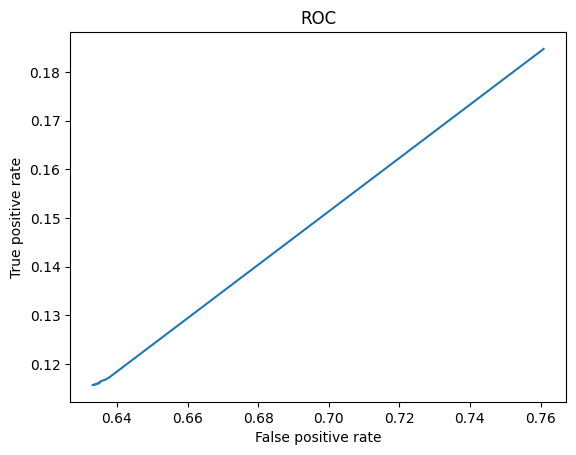

In [31]:
tpr_all=[]
fpr_all=[]
for threshold in np.arange(0, 1, 0.01):
    pred = prediction(test_features, threshold, f_idx)
    tpr, fpr = get_tpr_fpr(test_labels, pred)
    tpr_all.append(tpr)
    fpr_all.append(fpr)
plt.plot(fpr_all, tpr_all)
plt.title("ROC")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [32]:
threshold = 1e-11
preds = prediction(test_features, threshold, f_idx)
correct = 0
wrong = 0
for t, p in zip(test_labels, preds):
    if t == p:
        correct += 1
    else:
        wrong += 1
print(correct/len(test_labels))
print(wrong/len(test_labels))


0.24817246933465495
0.751827530665345


/var/folders/xb/h53k7r3j5_55k9r3s9dzr_tr0000gn/T/ipykernel_67035/2952110587.py:3: RuntimeWarning: overflow encountered in exp
  num = np.exp(0.5*(x-mean)**2 / (std_dev+1e-8), dtype='float')
/var/folders/xb/h53k7r3j5_55k9r3s9dzr_tr0000gn/T/ipykernel_67035/763660226.py:8: RuntimeWarning: invalid value encountered in double_scalars
  lrt = s_lh/ns_lh
